## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)


In [1]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!
# I had chatGPT break the packages into groups here

# ============================================================
# Basic packages
# ============================================================
import os                             # For file and directory operations
import numpy as np                    # For numerical computing and arrays
import pandas as pd                   # For data manipulation and analysis

# ============================================================
# Visualization packages
# ============================================================
import matplotlib.pyplot as plt        # Static 2D plotting
from matplotlib.colors import ListedColormap
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Interactive visualization with Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'        # Set renderer for interactive output in Colab or notebooks

# ============================================================
# Scikit-learn: Core utilities for model building and evaluation
# ============================================================
from sklearn.model_selection import train_test_split    # Train/test data splitting
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler  # Feature transformations and scaling
from sklearn.metrics import (                            # Model evaluation metrics
    mean_squared_error, r2_score, accuracy_score, 
    precision_score, recall_score, confusion_matrix, 
    classification_report
)

# ============================================================
# Scikit-learn: Linear and polynomial models
# ============================================================
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor       # For KNN

# ============================================================
# Scikit-learn: Synthetic dataset generators
# ============================================================
from sklearn.datasets import make_classification, make_regression

# ============================================================
# Scikit-learn: Naive Bayes models
# ============================================================
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# ============================================================
# Scikit-learn: Text feature extraction
# ============================================================
from sklearn.feature_extraction.text import CountVectorizer

# ============================================================
# Scikit-learn: Decision Trees
# ============================================================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


In [2]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0.5, 1],
                 colors=['steelblue', 'darkorange'], alpha=0.2)
    
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='steelblue', label='Class 0', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', alpha=0.7)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Synthetic Binary Classification Data")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    plt.show()

## Decision Trees

Today we are going to talk about Decision Trees (for classification and regression). Decision Trees use a series of splits to recursively split feature space into regions that divide up target variables. They are interpretable, meaning we can see how they are making their decisions, and they do a good job of capturing nonlinear relationships.

Decision Trees work by **recursively splitting** the data using a feature and threshold that best separate the target variable.  
At each step, the algorithm chooses the split that **reduces variance** (for regression) or **minimizes impurity** (for classification), where impurity is commonly measured as one of:


### Gini Impurity

Gini impurity measures how often a randomly chosen sample from a node would be incorrectly labeled if it were labeled according to the distribution of classes in that node.

Formula:

$$ G = 1 - \sum p_k^2  $$

where p_k is the proportion of class k in the node.

Example:  
If a node has  
- 80% of samples from class A → p_A = 0.8  
- 20% of samples from class B → p_B = 0.2  

Then  

$$
G = 1 - (0.8^2 + 0.2^2) = 1 - (0.64 + 0.04) = 0.32
$$  

That means the node is somewhat impure, since it contains a mix of both classes.  
If all samples were from class A (100\%), then

$$
G = 1 - (1^2) = 0
$$

A Gini impurity of 0 means perfect purity (only one class present).


### Entropy

Entropy comes from information theory.  
It measures uncertainty or how unpredictable the class labels are in a node.

Formula:  

$$
H = -\sum_k p_k \log_2(p_k)
$$

If all samples belong to one class → H = 0 (no uncertainty).  
If classes are evenly mixed (50/50) → H = 1 (maximum uncertainty).

Example:  
For 80\% A and 20\% B: 

$$
H = -(0.8 \log_2 0.8 + 0.2 \log_2 0.2) \approx 0.72
$$  

For a perfectly even mix (50\% A, 50\% B):  

$$
H = -(0.5 \log_2 0.5 + 0.5 \log_2 0.5) = 1
$$

---

### Comparing Gini and Entropy

| Situation | Gini | Entropy | Purity |
|------------|------|----------|--------|
| 100% one class | 0.0 | 0.0 | Pure |
| 80/20 mix | 0.32 | 0.72 | Somewhat impure |
| 50/50 mix | 0.50 | 1.00 | Very impure |

Both measures behave similarly — they are just two different ways to quantify impurity.

- Gini is slightly faster to compute.
- Entropy has a stronger theoretical connection to information theory.

In practice, they usually lead to very similar trees.

### What the Tree Does

At each node, the Decision Tree tries every possible split and picks the one that results in the biggest drop in impurity.  
This process repeats recursively until the stopping rules (like max_depth) are met.


### Decision Tree for Classification

Decision tree boundaries are piecewise-rectangular, showing how trees partition the space with axis-aligned splits.


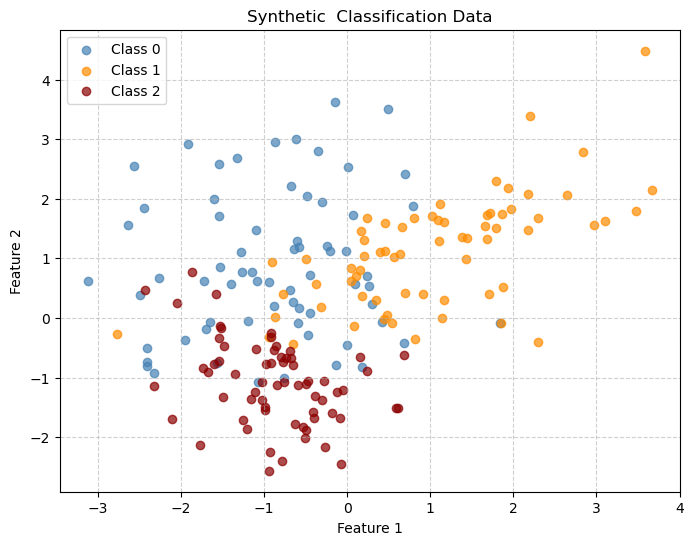

In [3]:
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1,n_classes=3, random_state=42
)

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='steelblue', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='darkorange', label='Class 1', alpha=0.7)
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='darkred', label='Class 2', alpha=0.7)

# Add labels and legend
plt.title("Synthetic  Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [5]:
clf = DecisionTreeClassifier(max_depth=2, 
                             criterion='gini', 
                             random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


We can view the complexity cutoffs that were used in the tree:

In [6]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
for c in path.ccp_alphas:
    print(c)

0.0
0.01997282608695653
0.13176652568922298
0.2003236607142858


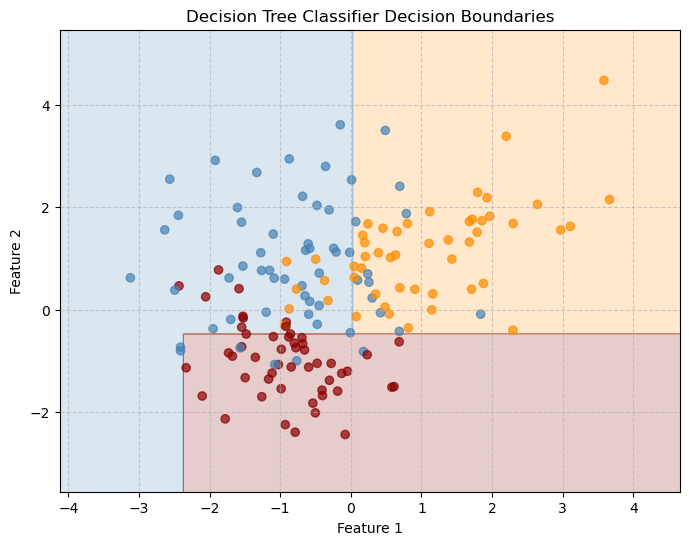

In [7]:
# Define grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
cmap=ListedColormap(['steelblue', 'darkorange', 'darkred'])
labels = ['Class 0 ','Class 1','Class 2']
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, 
             cmap=cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], 
            c=y_train, cmap=cmap,alpha=0.7)
plt.title("Decision Tree Classifier Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [8]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.900


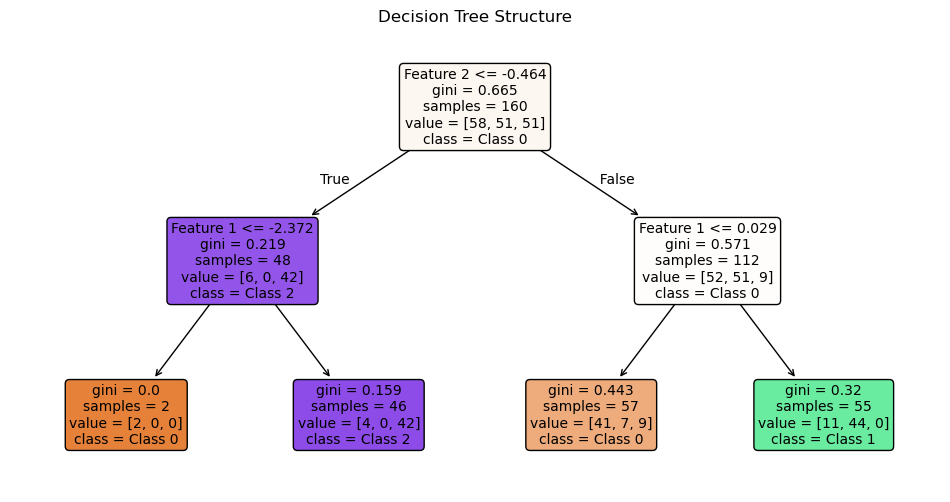

In [9]:
plt.figure(figsize=(12, 6))
plot_tree(clf,
          filled=True,
          feature_names=["Feature 1", "Feature 2"],
          class_names=["Class 0", "Class 1", "Class 2"],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

Accuracy: 0.525
Accuracy: 0.900
Accuracy: 0.900
Accuracy: 0.825
Accuracy: 0.725


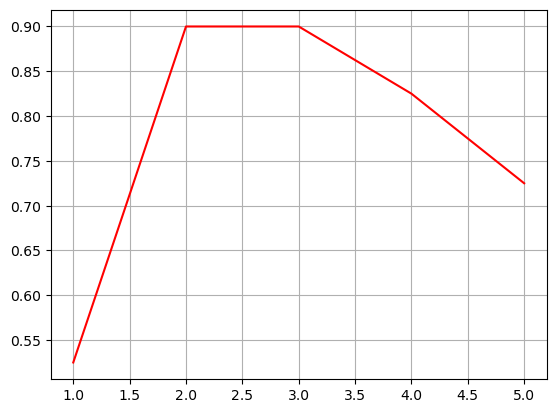

In [10]:
# What depth shoudl I use
accuracies=[]
depths = [1,2,3,4,5]
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, 
                             criterion='gini', 
                             random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc=accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy: {acc:.3f}")

plt.plot(depths,accuracies,'r')
plt.grid()
plt.show()

### Decision Tree for Regression

In [11]:
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)



In [12]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

R² score: 0.930
Mean Squared Error: 529.467


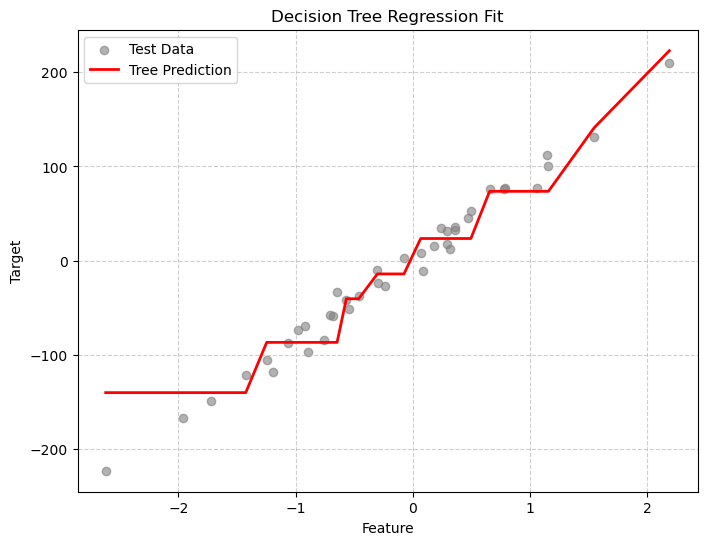

In [13]:
# Sort for smooth plotting
X_sorted = np.sort(X_test, axis=0)
y_smooth = tree_reg.predict(X_sorted)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="gray", alpha=0.6, label="Test Data")
plt.plot(X_sorted, y_smooth, color="red", linewidth=2, label="Tree Prediction")
plt.title("Decision Tree Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

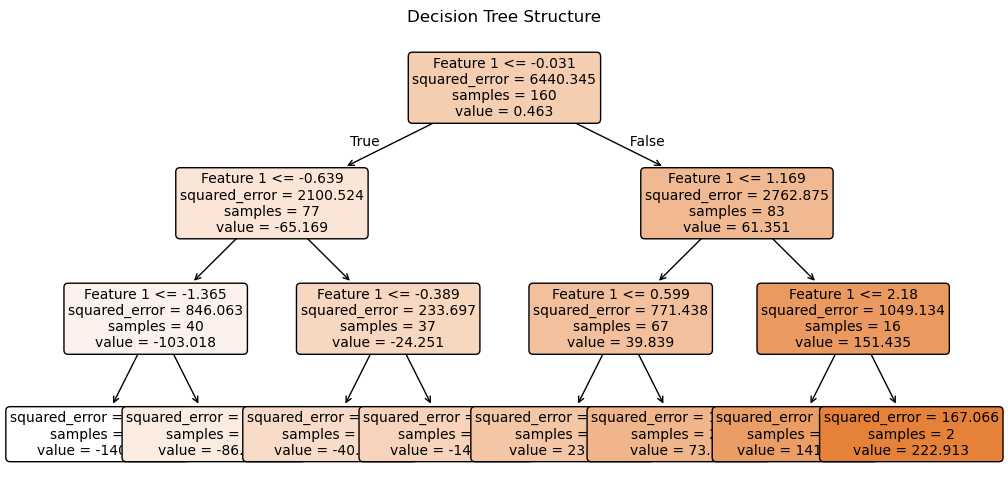

In [14]:
plt.figure(figsize=(12, 6))
plot_tree(tree_reg,
          filled=True,
          feature_names=["Feature 1"],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

## Controlling Tree Complexity


Increasing tree depth reduces training error but can lead to overfitting.   We can use pruning (`ccp_alpha`) to select an appropriate complexity level. When building a Decision Tree, sklearn can prune it after growing, meaning it removes branches that provide little improvement in predictive power.

By default there is no pruning and typically values are very small between 0 and 0.1.




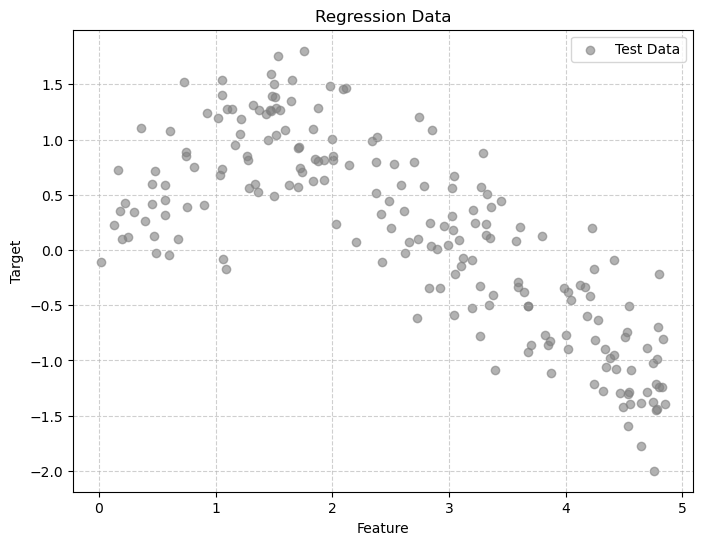

In [15]:
X = np.sort(5 * np.random.rand(200, 1), axis=0)
# Nonlinear target with noise
y = np.sin(X).ravel() + np.random.normal(scale=0.4, size=200)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


plt.figure(figsize=(8,6))
plt.scatter(X, y, color="gray", alpha=0.6, label="Test Data")
plt.title("Regression Data")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


### Decisions with no pruning and no max-depth

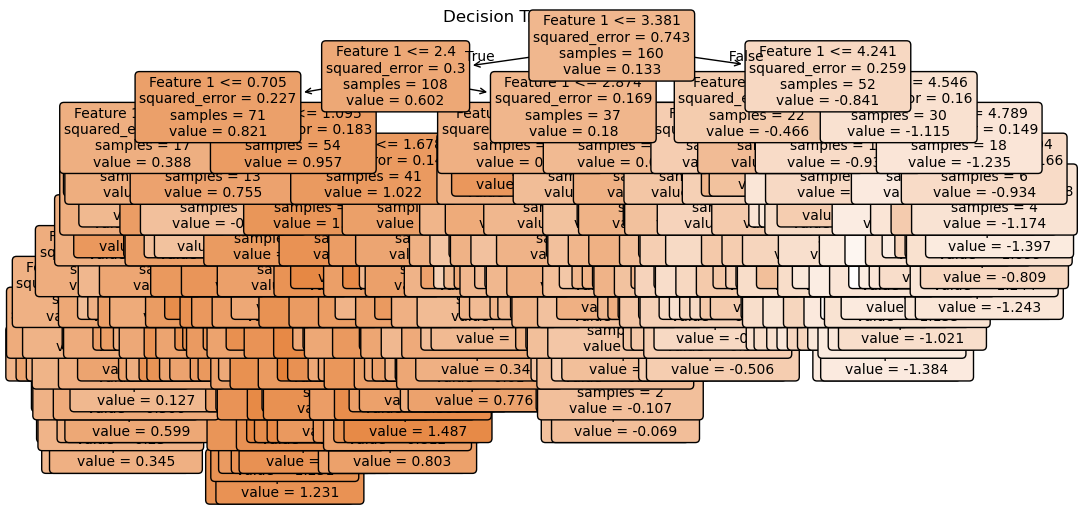

In [16]:
alpha = 0
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(tree_reg,
          filled=True,
          feature_names=["Feature 1"],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

In [17]:
mse_train = mean_squared_error(y_train, tree_reg.predict(X_train))
mse_test = mean_squared_error(y_test, tree_reg.predict(X_test))

print(f'MSE on Training: {mse_train}')
print(f'MSE on Testing: {mse_test}')

R_train = r2_score(y_train, tree_reg.predict(X_train))
R_test = r2_score(y_test, tree_reg.predict(X_test))

print(f'R2 on Training: {R_train}')
print(f'R2 on Testing: {R_test}')


MSE on Training: 0.0
MSE on Testing: 0.3997465538525665
R2 on Training: 1.0
R2 on Testing: 0.4697025847790265


**We had ZERO error on out training data and an R2 or 1!!!** What does this mean?

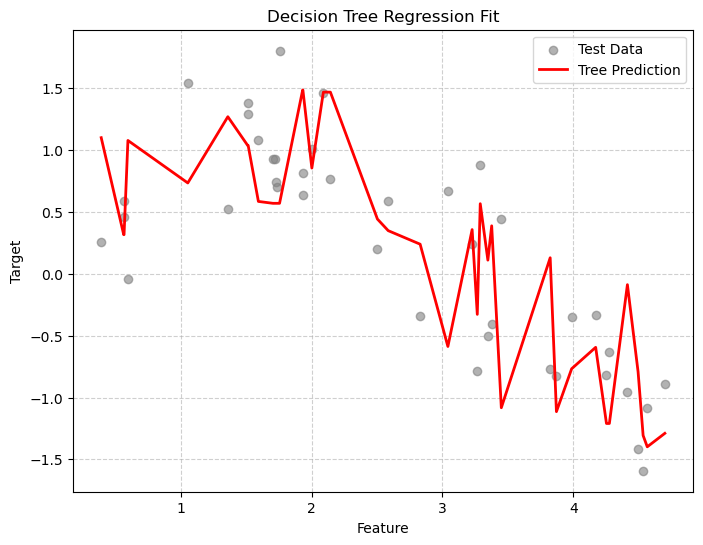

In [18]:
X_sorted = np.sort(X_test, axis=0)
y_smooth = tree_reg.predict(X_sorted)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="gray", alpha=0.6, label="Test Data")
plt.plot(X_sorted, y_smooth, color="red", linewidth=2, label="Tree Prediction")
plt.title("Decision Tree Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Clearly we are overtraining. We are memorizing the training data! Let's visualize the decision boundaries. This is clear from the difference in results between our training and testing data and also from the jaggedness of the prediction line.

**IMPORTANT** Remember that in general you will not be able to plot the decision lines or boundaries because typically your data is much higher dimensional that the examples that I am showing you here. This is why you MUST GET GOOD at interpreting the numerical measures of goodness of fit!!

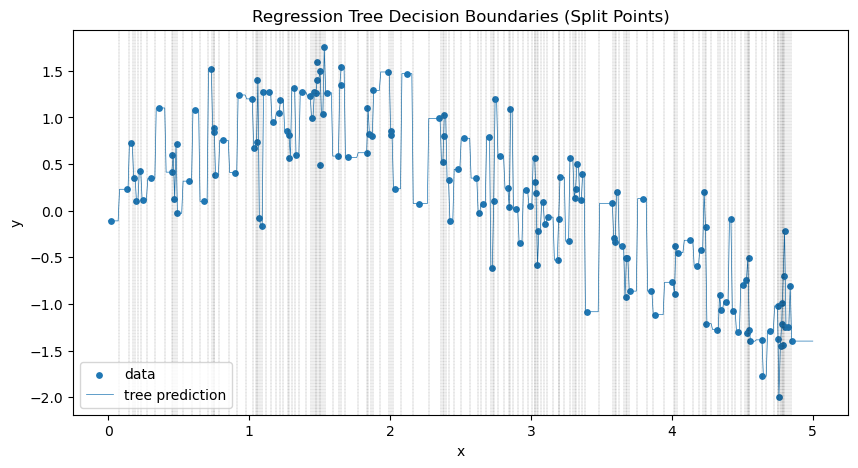

In [19]:
x_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x_plot)

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, s=15, label="data")
plt.plot(x_plot, y_pred, lw=.5, label="tree prediction")

tree_struct = tree_reg.tree_
split_thresholds = tree_struct.threshold[tree_struct.feature >= 0]
# vertical lines at the split thresholds
for thr in split_thresholds:
    plt.axvline(thr, color="black", linestyle="dashed",lw=0.2, alpha=0.7)

plt.title("Regression Tree Decision Boundaries (Split Points)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [20]:
path = tree_reg.cost_complexity_pruning_path(X_train, y_train)
for c in path.ccp_alphas:
    print(c)

0.0
1.0036299583071617e-08
4.6805515026282496e-08
9.825995694878742e-08
1.3417367673157488e-07
6.494630463940721e-07
1.0988020813076926e-06
4.859237553600515e-06
5.242439335729349e-06
5.482156219994982e-06
5.694579351902402e-06
5.9551902439843036e-06
7.441542460574768e-06
7.484325776870634e-06
8.087204097862594e-06
1.1128416254280875e-05
1.2560599716590626e-05
1.399369572063179e-05
1.8311251473421037e-05
2.425063300074042e-05
2.5330740473923642e-05
2.6297122762757854e-05
2.7545975760764453e-05
2.985218037773324e-05
4.053649208539678e-05
4.589007395321681e-05
4.956751153146755e-05
5.014138159585915e-05
5.895055071792818e-05
9.561188668235714e-05
9.771327856038029e-05
0.00010773807468462508
0.00011355327169148362
0.00012228772767053364
0.00012439792608422013
0.00013033208826624562
0.00014004611683328616
0.00014707065432892767
0.00015205057929002508
0.0001526568626882106
0.00016392553825776007
0.00017199747241474598
0.00017675156775865883
0.00021158468095552885
0.00022645033679112732
0.00

### Change $\alpha$ to add pruning - regularization

Above we printed the values of the complexity cutoffs. This helps give a range for possible $\alpha$ values.

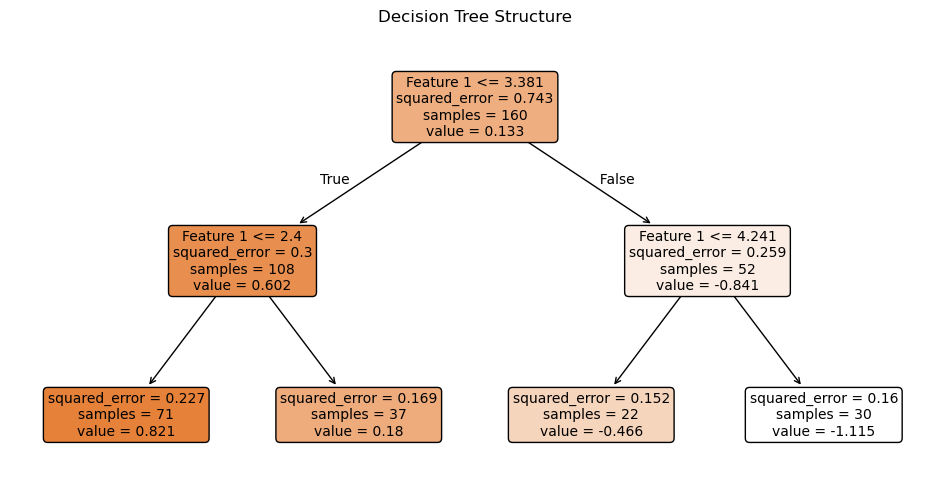

In [21]:
alpha = .03

tree_reg = DecisionTreeRegressor(ccp_alpha=alpha,
                                 random_state=42)
tree_reg.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(tree_reg,
          filled=True,
          feature_names=["Feature 1"],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

In [22]:
mse_train = mean_squared_error(y_train, tree_reg.predict(X_train))
mse_test = mean_squared_error(y_test, tree_reg.predict(X_test))

print(f'MSE on Training: {mse_train}')
print(f'MSE on Testing: {mse_test}')

R_train = r2_score(y_train, tree_reg.predict(X_train))
R_test = r2_score(y_test, tree_reg.predict(X_test))

print(f'R2 on Training: {R_train}')
print(f'R2 on Testing: {R_test}')

MSE on Training: 0.19058455480312442
MSE on Testing: 0.21636513788520761
R2 on Training: 0.7433893809106149
R2 on Testing: 0.7129734521569573


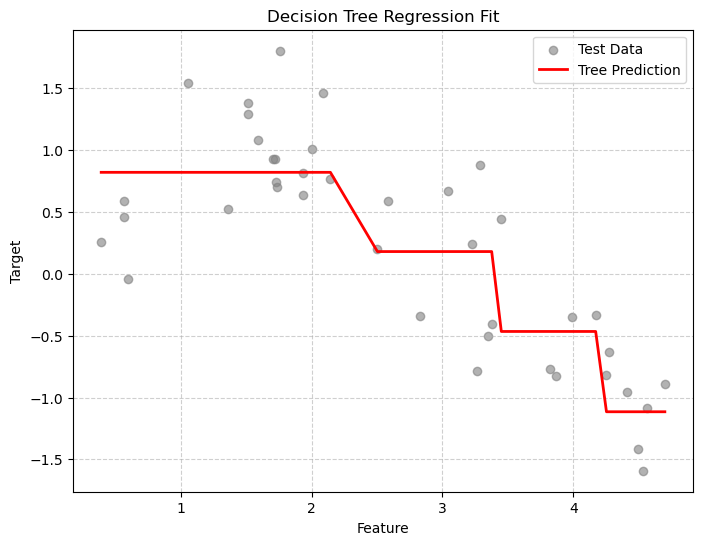

In [23]:
X_sorted = np.sort(X_test, axis=0)
y_smooth = tree_reg.predict(X_sorted)

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="gray", alpha=0.6, label="Test Data")
plt.plot(X_sorted, y_smooth, color="red", linewidth=2, label="Tree Prediction")
plt.title("Decision Tree Regression Fit")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### Exploring depths

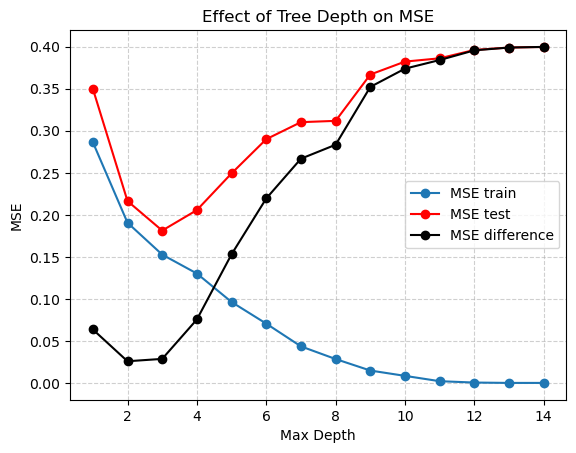

In [24]:
depths = range(1, 15)
mse_train = []
mse_test = []
diff = []
ccp_alpha=0
for d in depths:
    tree_reg = DecisionTreeRegressor(max_depth=d,
                                 random_state=42)
    tree_reg.fit(X_train, y_train)
    mtr = mean_squared_error(y_train, tree_reg.predict(X_train))
    mte = mean_squared_error(y_test, tree_reg.predict(X_test))
    mse_train.append(mtr)
    mse_test.append(mte)
    diff.append(mte-mtr)

plt.plot(depths, mse_train, 'o-',label='MSE train')
plt.plot(depths, mse_test, 'o-r',label='MSE test')
plt.plot(depths, diff, 'o-k', label='MSE difference')
plt.xlabel("Max Depth")
plt.ylabel("MSE")
plt.title("Effect of Tree Depth on MSE")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


Here it looks like a tree depth of two reduces the difference between the training and testing MSE the most, but probably a depth of 5 is best for the lowest MSE on the testing data. But we also need to select alpha!

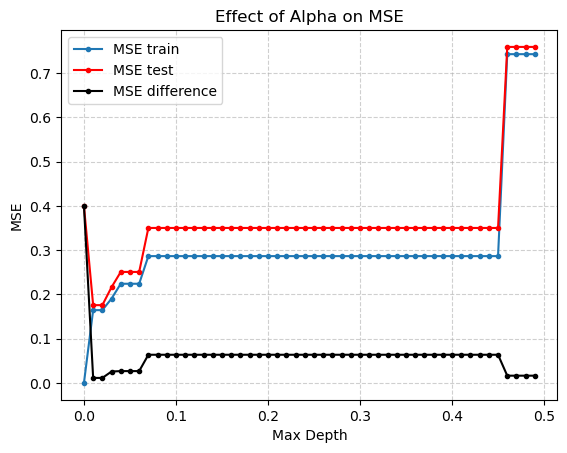

In [25]:
alphas = np.arange(0,.5,.01)
mse_train = []
mse_test = []
diff = []
ccp_alpha=0
for a in alphas:
    tree_reg = DecisionTreeRegressor(ccp_alpha=a,
                                 random_state=42)
    tree_reg.fit(X_train, y_train)
    mtr = mean_squared_error(y_train, tree_reg.predict(X_train))
    mte = mean_squared_error(y_test, tree_reg.predict(X_test))
    mse_train.append(mtr)
    mse_test.append(mte)
    diff.append(mte-mtr)

plt.plot(alphas, mse_train, '.-',label='MSE train')
plt.plot(alphas, mse_test, '.-r',label='MSE test')
plt.plot(alphas, diff, '.-k', label='MSE difference')
plt.xlabel("Max Depth")
plt.ylabel("MSE")
plt.title("Effect of Alpha on MSE")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

It looks like an $\alpha$ of .01 is best. But how do we really pick both $alpha$ and depth to be the best possible values?

## Cross-validation (coming soon!)

So far we have been using simple for loops and a just two data sets (Training and Testing/Validation) to check which hyperparameters are best. There are much better ways to do this!

Cross-validation is a resampling technique used to estimate how well a model will generalize to unseen data. Instead of training the model once and evaluating it once, cross-validation repeatedly splits the data into training and validation sets in a systematic way.

It is one of the most important concepts in machine learning, especially for preventing overfitting.

## Using Decision Trees for Feature Importance and Feature Engineering

Decision Trees don't just make predictions they also tell us which features are most important for those predictions.

This information is useful for:
- **Understanding** what drives the model's decisions  
- **Reducing dimensionality** (removing unimportant features)  
- **Creating new features** (interactions or transformations of important ones)


### How Feature Importance Works

Each split in a decision tree is chosen to reduce impurity (for example, Gini impurity or entropy for classification, variance for regression).

The importance of a feature is calculated by looking at how much each split using that feature reduces impurity, averaged over all nodes where that feature is used.

For feature $j$:

$$
\text{Importance}(j) = \frac{1}{T} \sum_{t \in T_j} \left( N_t \cdot \Delta I_t \right)
$$

where:

- $T_j$ = set of nodes where feature $j$ is used  
- $N_t$ = number of samples reaching node $t$  
- $\Delta I_t$ = impurity decrease (before split - after split)  
- $T$ = all nodes in the tree  

Finally, the importances are normalized to sum to 1.

---

### Interpreting Feature Importance

- Higher values mean the feature contributed more to reducing impurity.  
- Features with importance close to **0** likely didn’t help much in prediction.  

This helps us **identify which features matter most** for our model.

---

### Example: Using a Decision Tree for Feature Importance

We will reload the familiar Iris data set from earlier in the class. (Day 12 - Intro to ML)

petal length (cm)    0.585616
petal width (cm)     0.414384
sepal width (cm)     0.000000
sepal length (cm)    0.000000
dtype: float64


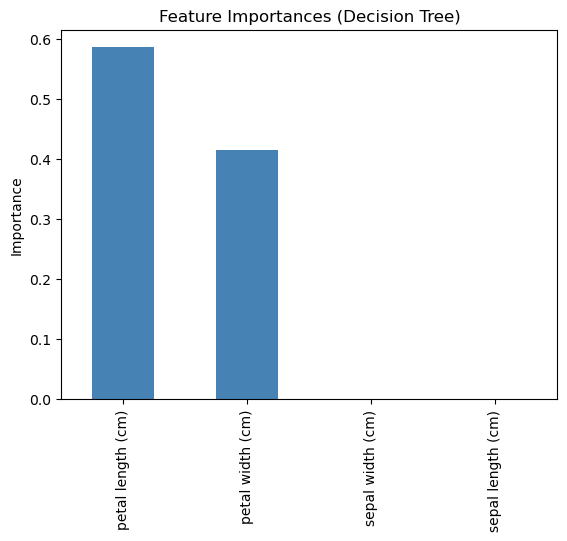

In [26]:
from sklearn.datasets import load_iris

# Load a simple dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train a Decision Tree
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X, y)

# Get feature importances
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display and plot
print(importances)

importances.plot(kind='bar', color='steelblue', title='Feature Importances (Decision Tree)')
plt.ylabel("Importance")
plt.show()

In [27]:
X.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

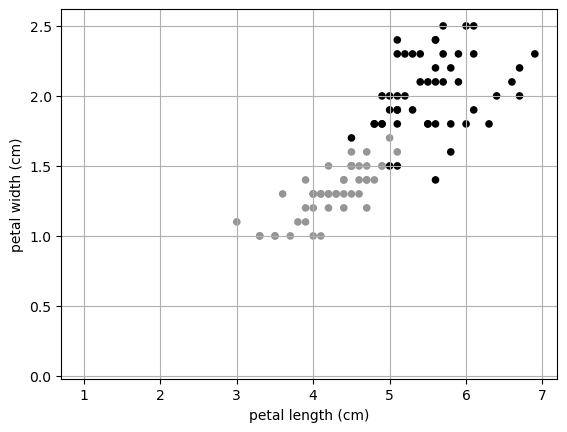

In [29]:
X.plot.scatter(x= 'petal length (cm)',
               y = 'petal width (cm)',
               color = y)
plt.grid()
plt.show()